In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/MyDrive/NN2_bit_decoder' '/content'

# Load NumPy data

In [ ]:
import numpy as np
import tensorflow as tf
import os

Extract .npz files with array from each category:

In [ ]:
!7z x /content/ones1.7z

### Load from `.npz` file

In [ ]:
train_examples = []
train_labels = []
test_examples = []
test_labels = []
for npz_file_number in range(23):
    data = np.load('/content/ones/1_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      train_examples.append(data['arr_'+str(j)])
      train_labels.append(1)
for npz_file_number in range(23,25):
    data = np.load('/content/ones/1_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      test_examples.append(data['arr_'+str(j)])
      test_labels.append(1)
for npz_file_number in range(23):
    data = np.load('/content/zeroes/0_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      train_examples.append(data['arr_'+str(j)])
      train_labels.append(0)
for npz_file_number in range(23,25):
    data = np.load('/content/zeroes/0_packets'+str(npz_file_number)+'.npz')
    for j in range(42):
      test_examples.append(data['arr_'+str(j)])
      test_labels.append(0)

print(np.shape(train_examples),np.shape(train_labels))
print(np.shape(test_examples),test_labels)

(1932, 4) (1932,)
(168, 4) [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Load NumPy arrays with `tf.data.Dataset`

Assuming you have an array of examples and a corresponding array of labels, pass the two arrays as a tuple into `tf.data.Dataset.from_tensor_slices` to create a `tf.data.Dataset`.

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1932

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

### Build and train a model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LayerNormalization(axis=1 , center=True , scale=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset, epochs=20)

Epoch 1/20
61/61 [==============================] - 1s 2ms/step - loss: 2.1578 - accuracy: 0.4317
Epoch 2/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.4865
Epoch 3/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.5109
Epoch 4/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.4881
Epoch 5/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.5223
Epoch 6/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.5093
Epoch 7/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.5000
Epoch 8/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.5207
Epoch 9/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.5487
Epoch 10/20
61/61 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.5228
Epoch 11/20
61/61 [

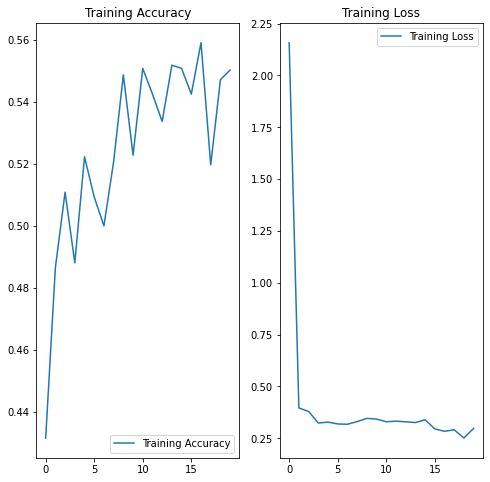

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
#val_acc = history.history['val_acc']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
!7z x /content/stream.7z

In [ ]:
results = model.evaluate(test_dataset)
print("test loss, test acc:", results)

data = np.load('/content/pack_bit1'+'.npz') #receive start position of the packet from the 1st neural network (another file) + 40 samples - data(!!!) begins 
print(data.files)
stream = data['arr_0']
slicey=[]
for i in range(32,256,4):# short - 280 samples msg = 56 bit, ext - 560 samples msg = 112 bit, preamble = 40 samps
    slicey.append(stream[i:i+4])
print(np.shape(slicey))
sliceyy=np.array(slicey)
classes = model.predict_classes(sliceyy)
print(len(classes))
np.set_printoptions(threshold=np.inf)
print(classes)

6/6 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8571
test loss, test acc: [0.3630771040916443, 0.8571428656578064]
['arr_0']
(56, 4)
56
[0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from tensorflow import keras
#model.save("my_modeldecode2") - MAIN SAVING MODEL FUNCTION (USE ONLY WITH CORRECT/IMPROVED MODELS)

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_modeldecode2")

# Let's check:
'''np.testing.assert_allclose(
    model.predict(test_dataset), reconstructed_model.predict(test_dataset)
)'''

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(test_dataset)

data = np.load('/content/resamp_packets.bitdecode'+'.npz')
print(data.files)
bit_stream = data['arr_25']
bits=[]
for i in range(32,480,4):# short - 280 samples msg = 56 bit, ext - 560 samples msg = 112 bit, preamble = 40 samps
    bits.append(bit_stream[i:i+4])
print(np.shape(bits))
bit_arr=np.array(bits)
classes1 = (reconstructed_model.predict(bit_arr) > 0.5).astype("int32")# gives the duplicated array with shape (112,2) TensorGod knows why (deprecated model.predict_classes worked well)
print(len(classes1))
np.set_printoptions(threshold=np.inf)
bit_string = classes1.flatten('F')
print(bit_string)
print(len(bit_string))

6/6 [==============================] - 1s 3ms/step - loss: 0.2174 - accuracy: 0.5000
['arr_0', 'arr_1', 'arr_2', 'arr_3', 'arr_4', 'arr_5', 'arr_6', 'arr_7', 'arr_8', 'arr_9', 'arr_10', 'arr_11', 'arr_12', 'arr_13', 'arr_14', 'arr_15', 'arr_16', 'arr_17', 'arr_18', 'arr_19', 'arr_20', 'arr_21', 'arr_22', 'arr_23', 'arr_24', 'arr_25', 'arr_26', 'arr_27', 'arr_28', 'arr_29', 'arr_30', 'arr_31', 'arr_32', 'arr_33', 'arr_34', 'arr_35', 'arr_36', 'arr_37', 'arr_38', 'arr_39', 'arr_40', 'arr_41', 'arr_42', 'arr_43', 'arr_44', 'arr_45', 'arr_46', 'arr_47', 'arr_48', 'arr_49', 'arr_50', 'arr_51', 'arr_52', 'arr_53', 'arr_54', 'arr_55', 'arr_56', 'arr_57', 'arr_58', 'arr_59', 'arr_60']
(112, 4)
112
[1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1
 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1
 

In [ ]:
#just bit check comparing to real data (automated testing would be great - I'll upload more data samples to check the network if you know how to automate prediction)
stringbit='''1000110101001100101000110101000101011000101110010111001011111101010111010011111100011111001000001101001100001011

'''
stringbit.count('0')

54

In [ ]:
!rsync -r --progress "/content/my_modeldecode2" "/content/drive/MyDrive" 